In [1]:
import os
from bs4 import BeautifulSoup
from splinter import Browser
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome')

In [3]:
url = "http://www.hospitalsafetygrade.org/search?findBy=state&zip_code=&city=&state_prov=CA&hospital="
browser.visit(url)


In [4]:

html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [5]:
print(soup)

<!DOCTYPE html>
<!-- Atlas Workcenter: Content Management by Atlas Works, LLC --><html class="js" lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Search Results</title>
<meta charset="utf-8"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<!--[if lt IE 9]>
		<script src="http://html5shiv.googlecode.com/svn/trunk/html5.js"></script>
		<script src="http://ie7-js.googlecode.com/svn/version/2.1(beta4)/IE9.js"></script>
	<![endif]-->
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" id="view" name="viewport"/>
<script async="" src="https://ws.sharethis.com/button/p.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" src="//connect.facebook.net/en_US/fbds.js"></script><script id="async-buttons" src="https://ws.sharethis.com/button/async-buttons.js" type="text/javascript"></script><script src="/media/file/responsive-nav.js"></script>
<script type="text/

In [6]:
alldata = soup.find_all('div', class_= "itemWrapper leapfrogSearchResult")
print(alldata)

[]


In [7]:
reviews = {}
grades=[]
lats = []
lons = []
names = []
addresses = []
# print(alldata)
for i in range(0,256):

    grade = (alldata[i].get("data-grade"))
    name = (alldata[i].get("data-name"))
    lat = (alldata[i].get("data-lat"))
    lon = (alldata[i].get("data-lon"))
    names.append(name)
    grades.append(grade)
    lats.append(lat)
    lons.append(lon)
#     addresses.append(address)
reviews["lons"] = lons
reviews["lats"] = lats
reviews["names"] = names
reviews["grade"] = grades
# reviews["addresses"]  =addresses
print(reviews)



{'lons': ['-115.5683905', '-116.2762479', '-116.2354774', '-116.40063', '-116.54408', '-116.9459031', '-116.9601344', '-117.2655636', '-117.2977603', '-117.2051741', '-117.186026', '-117.1960044', '-117.2769883', '-117.2515843', '-117.2639465', '-117.1645046', '-117.3217772', '-117.1060989', '-117.1691492', '-117.351125', '-117.1839316', '-117.2375905', '-117.3816002', '-117.0560448', '-117.431968', '-117.0064571', '-117.1214691', '-117.4398166', '-117.0573188', '-117.0229286', '-117.4691755', '-117.0951878', '-117.0828852', '-117.083151', '-117.1542381', '-117.2902595', '-117.1600534', '-117.1659225', '-117.608757', '-117.6378263', '-117.2255426', '-117.225776', '-117.5683133', '-117.1686795', '-117.2839126', '-117.2428136', '-117.7514976', '-117.8346593', '-117.6654654', '-117.8713194', '-117.7087247', '-117.8934248', '-117.8434267', '-117.7722362', '-117.7743829', '-117.8446219', '-118.15843', '-117.740473', '-117.9446757', '-118.1450788', '-117.8652002', '-117.9864524', '-117.92761

In [ ]:
addressesl = []
addresses = soup.find_all('div', class_= "address")
addressesl = addresses
# 

In [ ]:
hospitalreviews_df = pd.DataFrame.from_dict(reviews)
hospitalreviews_df["names"] = hospitalreviews_df["names"].str.upper()
hospitalreviews_df.reset_index()

In [ ]:
names = []
addresses = []
address = soup.find_all('div', class_= "address")

for l in range(0,256):
    ad = (address[l]).text
    ac = ad.lstrip("'\n                                                                               ")
    ad = ac.rstrip("\n                                            ''")
    addresses.append(ad)
    
#     print(ad)
print(addresses)
reviews["addresses"]  = addresses
print(reviews)

In [ ]:
recodedhospitalreviews_df = pd.DataFrame.from_dict(reviews)
recodedhospitalreviews_df["names"] = recodedhospitalreviews_df["names"].str.upper()

recodedhospitalreviews_df["addresses"] = recodedhospitalreviews_df["addresses"].str.upper()

recodedhospitalreviews_df['ZIP1'] = recodedhospitalreviews_df['addresses'].str[-10:]

ZIP2 = []
for t in range(len(recodedhospitalreviews_df['ZIP1'])):
    a = re.sub('[^0-9]','',recodedhospitalreviews_df.ZIP1[t])
    ZIP2.append(a)
# print(ZIP2)
recodedhospitalreviews_df["ZIP2"] = ZIP2

In [ ]:
recodedhospitalreviews_df

In [ ]:
writer = pd.ExcelWriter('output.xlsx')
recodedhospitalreviews_df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
#opened in excel to correct the encoding error. one of the - in the source file was the wrong format and I couldn;t convert in pandas
csv_file1 = "output.csv"
numericvars_df = pd.read_csv(csv_file1, encoding = 'utf-8', sep=',', header=0, low_memory=False)

In [ ]:
numericvars_df.info()
numericvars_df.fillna(0.0)

In [ ]:
connection_string = "root:password@localhost/clia0918_db"
engine = create_engine(f'mysql://{connection_string}',  pool_size=100, max_overflow=200)
numericvars_df.to_sql("hospitalreviewswithaddressesnumeric3", engine, index=False)

In [114]:
csv_file3 = "finally(big).csv"
allthedatas_df = pd.read_csv(csv_file3, encoding = 'utf-8', sep=',', header=0)
allthedatas_df

Unnamed: 0        lons       lats  \
0            184 -121.802954  37.982588   
1             94 -118.265059  34.054199   
2            215 -121.946330  37.252071   
3             99 -118.294413  34.098423   
4             97 -118.290578  34.096221   
5             88 -118.208102  34.059442   
6             99 -118.294413  34.098423   
7             99 -118.294413  34.098423   
8             94 -118.265059  34.054199   
9            215 -121.946330  37.252071   
10            99 -118.294413  34.098423   
11            97 -118.290578  34.096221   
12            88 -118.208102  34.059442   
13            99 -118.294413  34.098423   
14            99 -118.294413  34.098423   
15            84 -118.130298  33.935296   
16            94 -118.265059  34.054199   
17           215 -121.946330  37.252071   
18            99 -118.294413  34.098423   
19            97 -118.290578  34.096221   
20            88 -118.208102  34.059442   
21            99 -118.294413  34.098423   
22            99 -118.294413  34.098423   
23            94 -118.265059  34.054199   
24           215 -121.946330  37.252071   
25            99 -118.294413  34.098423   
26            97 -118.290578  34.096221   
27            88 -118.208102  34.059442   
28            99 -118.294413  34.098423   
29            99 -118.294413  34.098423   
...          ...         ...        ...   
1303         170 -121.469532  38.570890   
1304         175 -121.288728  37.969868   
1305         177 -121.792120  38.664038   
1306         185 -120.719749  35.555330   
1307         189 -122.047611  38.261855   
1308         191 -121.386105  36.833898   
1309         192 -121.880208  37.694405   
1310         193 -121.571390  37.036545   
1311         207 -122.089692  37.698341   
1312         209 -121.938379  37.327755   
1313         211 -122.087952  37.633704   
1314         213 -121.646662  36.659332   
1315         214 -121.793002  36.927175   
1316         218 -122.465144  38.288109   
1317         221 -122.232947  37.799562   
1318         223 -122.262747  37.822057   
1319         224 -122.253415  37.762816   
1320         227 -122.175563  37.433245   
1321         228 -121.983667  36.990166   
1322         233 -122.631654  38.254590   
1323         234 -122.390270  37.764855   
1324         235 -122.254791  37.479738   
1325         236 -122.409161  37.795472   
1326         237 -122.560363  38.099311   
1327         240 -122.299298  37.531268   
1328         246 -122.535891  37.947411   
1329         248 -122.453648  37.774046   
1330         249 -122.457814  37.763089   
1331         254 -122.474201  37.679940   
1332         255 -124.142212  40.783923   

                                                  names grade  \
0                           SUTTER DELTA MEDICAL CENTER     c   
1                GOOD SAMARITAN HOSPITAL OF LOS ANGELES     c   
2                   GOOD SAMARITAN HOSPITAL OF SAN JOSE     c   
3          KAISER PERMANENTE LOS ANGELES MEDICAL CENTER     b   
4                 HOLLYWOOD PRESBYTERIAN MEDICAL CENTER     d   
5     LOS ANGELES COUNTY UNIVERSITY OF SOUTHERN CALI...     d   
6          KAISER PERMANENTE LOS ANGELES MEDICAL CENTER     b   
7          KAISER PERMANENTE LOS ANGELES MEDICAL CENTER     b   
8                GOOD SAMARITAN HOSPITAL OF LOS ANGELES     c   
9                   GOOD SAMARITAN HOSPITAL OF SAN JOSE     c   
10         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER     b   
11                HOLLYWOOD PRESBYTERIAN MEDICAL CENTER     d   
12    LOS ANGELES COUNTY UNIVERSITY OF SOUTHERN CALI...     d   
13         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER     b   
14         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER     b   
15                         PIH HEALTH HOSPITAL - DOWNEY     c   
16               GOOD SAMARITAN HOSPITAL OF LOS ANGELES     c   
17                  GOOD SAMARITAN HOSPITAL OF SAN JOSE     c   
18         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER     b   
19                HOLLYWOOD PRESBYTERIA

In [ ]:
allthedatas_dfdropped1 = allthedatas_df.dropna(subset = ['Prop Native Born'])


In [ ]:
allthedatas_dfdropped2 = allthedatas_dfdropped1.dropna(subset = ['Pop 5 years +'])
allthedatas_dfdropped3 = allthedatas_dfdropped2.dropna(subset = ['CITY_NAME'])

In [ ]:
allthedatas_dfdropped3.drop(columns="Unnamed: 0")
allthedatas_dfdropped3.drop_duplicates()


In [78]:
writer = pd.ExcelWriter('cutdownasfarasitwillgo.xlsx')
allthedatas_dfdropped3.to_excel(writer,'Sheet1')
writer.save()

In [10]:
csv_file3 = "../CSV/p3csveditedinexcel1.csv"
cutdata_df = pd.read_csv(csv_file3, encoding = 'utf-8', sep=',', header=0)
cutdata_df.drop_duplicates(keep='last')
cutdata_df["GRADE"].replace({'a': 100, 'b': 80, 'c': 60, 'd':40, 'f': 0.0 }, inplace=True)

In [11]:

#GOOD CHOICES????

cutdata_df = cutdata_df
cutdata_df



LON        LAT  \
0    -121.802954  37.982588   
1    -118.265059  34.054199   
2    -121.946330  37.252071   
3    -118.294413  34.098423   
4    -118.290578  34.096221   
5    -118.208102  34.059442   
6    -118.294413  34.098423   
7    -118.294413  34.098423   
8    -118.265059  34.054199   
9    -121.946330  37.252071   
10   -118.294413  34.098423   
11   -118.290578  34.096221   
12   -118.208102  34.059442   
13   -118.294413  34.098423   
14   -118.294413  34.098423   
15   -118.130298  33.935296   
16   -118.265059  34.054199   
17   -121.946330  37.252071   
18   -118.294413  34.098423   
19   -118.290578  34.096221   
20   -118.208102  34.059442   
21   -118.294413  34.098423   
22   -118.294413  34.098423   
23   -118.265059  34.054199   
24   -121.946330  37.252071   
25   -118.294413  34.098423   
26   -118.290578  34.096221   
27   -118.208102  34.059442   
28   -118.294413  34.098423   
29   -118.294413  34.098423   
...          ...        ...   
1052 -118.479607  34.030739   
1053 -122.257304  37.855928   
1054 -121.932881  37.312869   
1055 -119.784008  36.742815   
1056 -119.784008  36.742815   
1057 -119.784008  36.742815   
1058 -119.784008  36.742815   
1059 -119.784008  36.742815   
1060 -119.784008  36.742815   
1061 -119.784008  36.742815   
1062 -119.784008  36.742815   
1063 -119.784008  36.742815   
1064 -117.251584  34.047210   
1065 -117.263947  34.050757   
1066 -117.169149  33.614587   
1067 -121.286652  38.121858   
1068 -117.225776  32.878563   
1069 -121.286652  38.121858   
1070 -121.286652  38.121858   
1071 -117.772236  33.660895   
1072 -117.196004  33.912178   
1073 -117.930047  33.624743   
1074 -121.286652  38.121858   
1075 -119.039956  35.384809   
1076 -118.186697  33.807975   
1077 -121.286652  38.121858   
1078 -117.381600  33.976781   
1079 -117.381600  33.976781   
1080 -117.381600  33.976781   
1081 -117.381600  33.976781   

                                              FAC_NAME1  GRADE  \
0                           SUTTER DELTA MEDICAL CENTER   60.0   
1                GOOD SAMARITAN HOSPITAL OF LOS ANGELES   60.0   
2                   GOOD SAMARITAN HOSPITAL OF SAN JOSE   60.0   
3          KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
4                 HOLLYWOOD PRESBYTERIAN MEDICAL CENTER   40.0   
5     LOS ANGELES COUNTY UNIVERSITY OF SOUTHERN CALI...   40.0   
6          KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
7          KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
8                GOOD SAMARITAN HOSPITAL OF LOS ANGELES   60.0   
9                   GOOD SAMARITAN HOSPITAL OF SAN JOSE   60.0   
10         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
11                HOLLYWOOD PRESBYTERIAN MEDICAL CENTER   40.0   
12    LOS ANGELES COUNTY UNIVERSITY OF SOUTHERN CALI...   40.0   
13         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
14         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
15                         PIH HEALTH HOSPITAL - DOWNEY   60.0   
16               GOOD SAMARITAN HOSPITAL OF LOS ANGELES   60.0   
17                  GOOD SAMARITAN HOSPITAL OF SAN JOSE   60.0   
18         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
19                HOLLYWOOD PRESBYTERIAN MEDICAL CENTER   40.0   
20    LOS ANGELES COUNTY UNIVERSITY OF SOUTHERN CALI...   40.0   
21         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
22         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
23               GOOD SAMARITAN HOSPITAL OF LOS ANGELES   60.0   
24                  GOOD SAMARITAN HOSPITAL OF SAN JOSE   60.0   
25         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
26                HOLLYWOOD PRESBYTERIAN MEDICAL CENTER   40.0   
27    LOS ANGELES COUNTY UNIVERSITY OF SOUTHERN CALI...   40.0   
28         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
29         KAISER PERMANENTE LOS ANGELES MEDICAL CENTER   80.0   
...                                         

In [10]:
cutdatat_df = cutdata_df.transpose()
cutdatat_df = cutdatat_df.dropna() 

In [12]:
cutdatapearsoncorrelations_df = cutdata_df.corr(method='pearson').dropna(how='all', axis=[0,1]).style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
pcorr_df = cutdata_df.corr(method='pearson').dropna(how='all', axis=[0,1])
cutdatapearsoncorrelations_df


C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  
C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [13]:
cutdataspearmancorrelations_df = cutdata_df.corr(method='spearman').dropna(how='all', axis=[0,1]).style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
scorr_df = cutdata_df.corr(method='spearman').dropna(how='all', axis=[0,1])
cutdataspearmancorrelations_df

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  
C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [14]:
cutdata_df.corr().dropna(how='all', axis = [1, 0])
cutdatakendallcorrelations_df = cutdata_df.corr(method='kendall').dropna(how='all', axis = [1, 0]).style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
# cutdatakendallcorrelations_df
kcorr_df = cutdata_df.corr(method='kendall').dropna(how='all', axis=[0,1])
cutdatakendallcorrelations_df

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  after removing the cwd from sys.path.
C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [15]:
import numpy as np
import seaborn as sns
plt.rcParams.update({'font.size': 40, 'font.weight':"heavy"})
def halfHeatMap(df, mirror):

    # Create Correlation df
    corr = df.corr(method='spearman')
    # Plot figsize
    fig, ax = plt.subplots(figsize=(100, 100))
    # Generate Color Map
    colormap = plt.get_cmap('coolwarm')

    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".1f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot

    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True# Generate Color Map
        colormap = sns.diverging_palette(200, 0.01, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".1f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
#         plt.axes.Axes.set_ylabel(yticks, fontdict=None, labelpad=10)
        plt.savefig("spearman.pdf", bbox_inches='tight')
        
        plt.show()

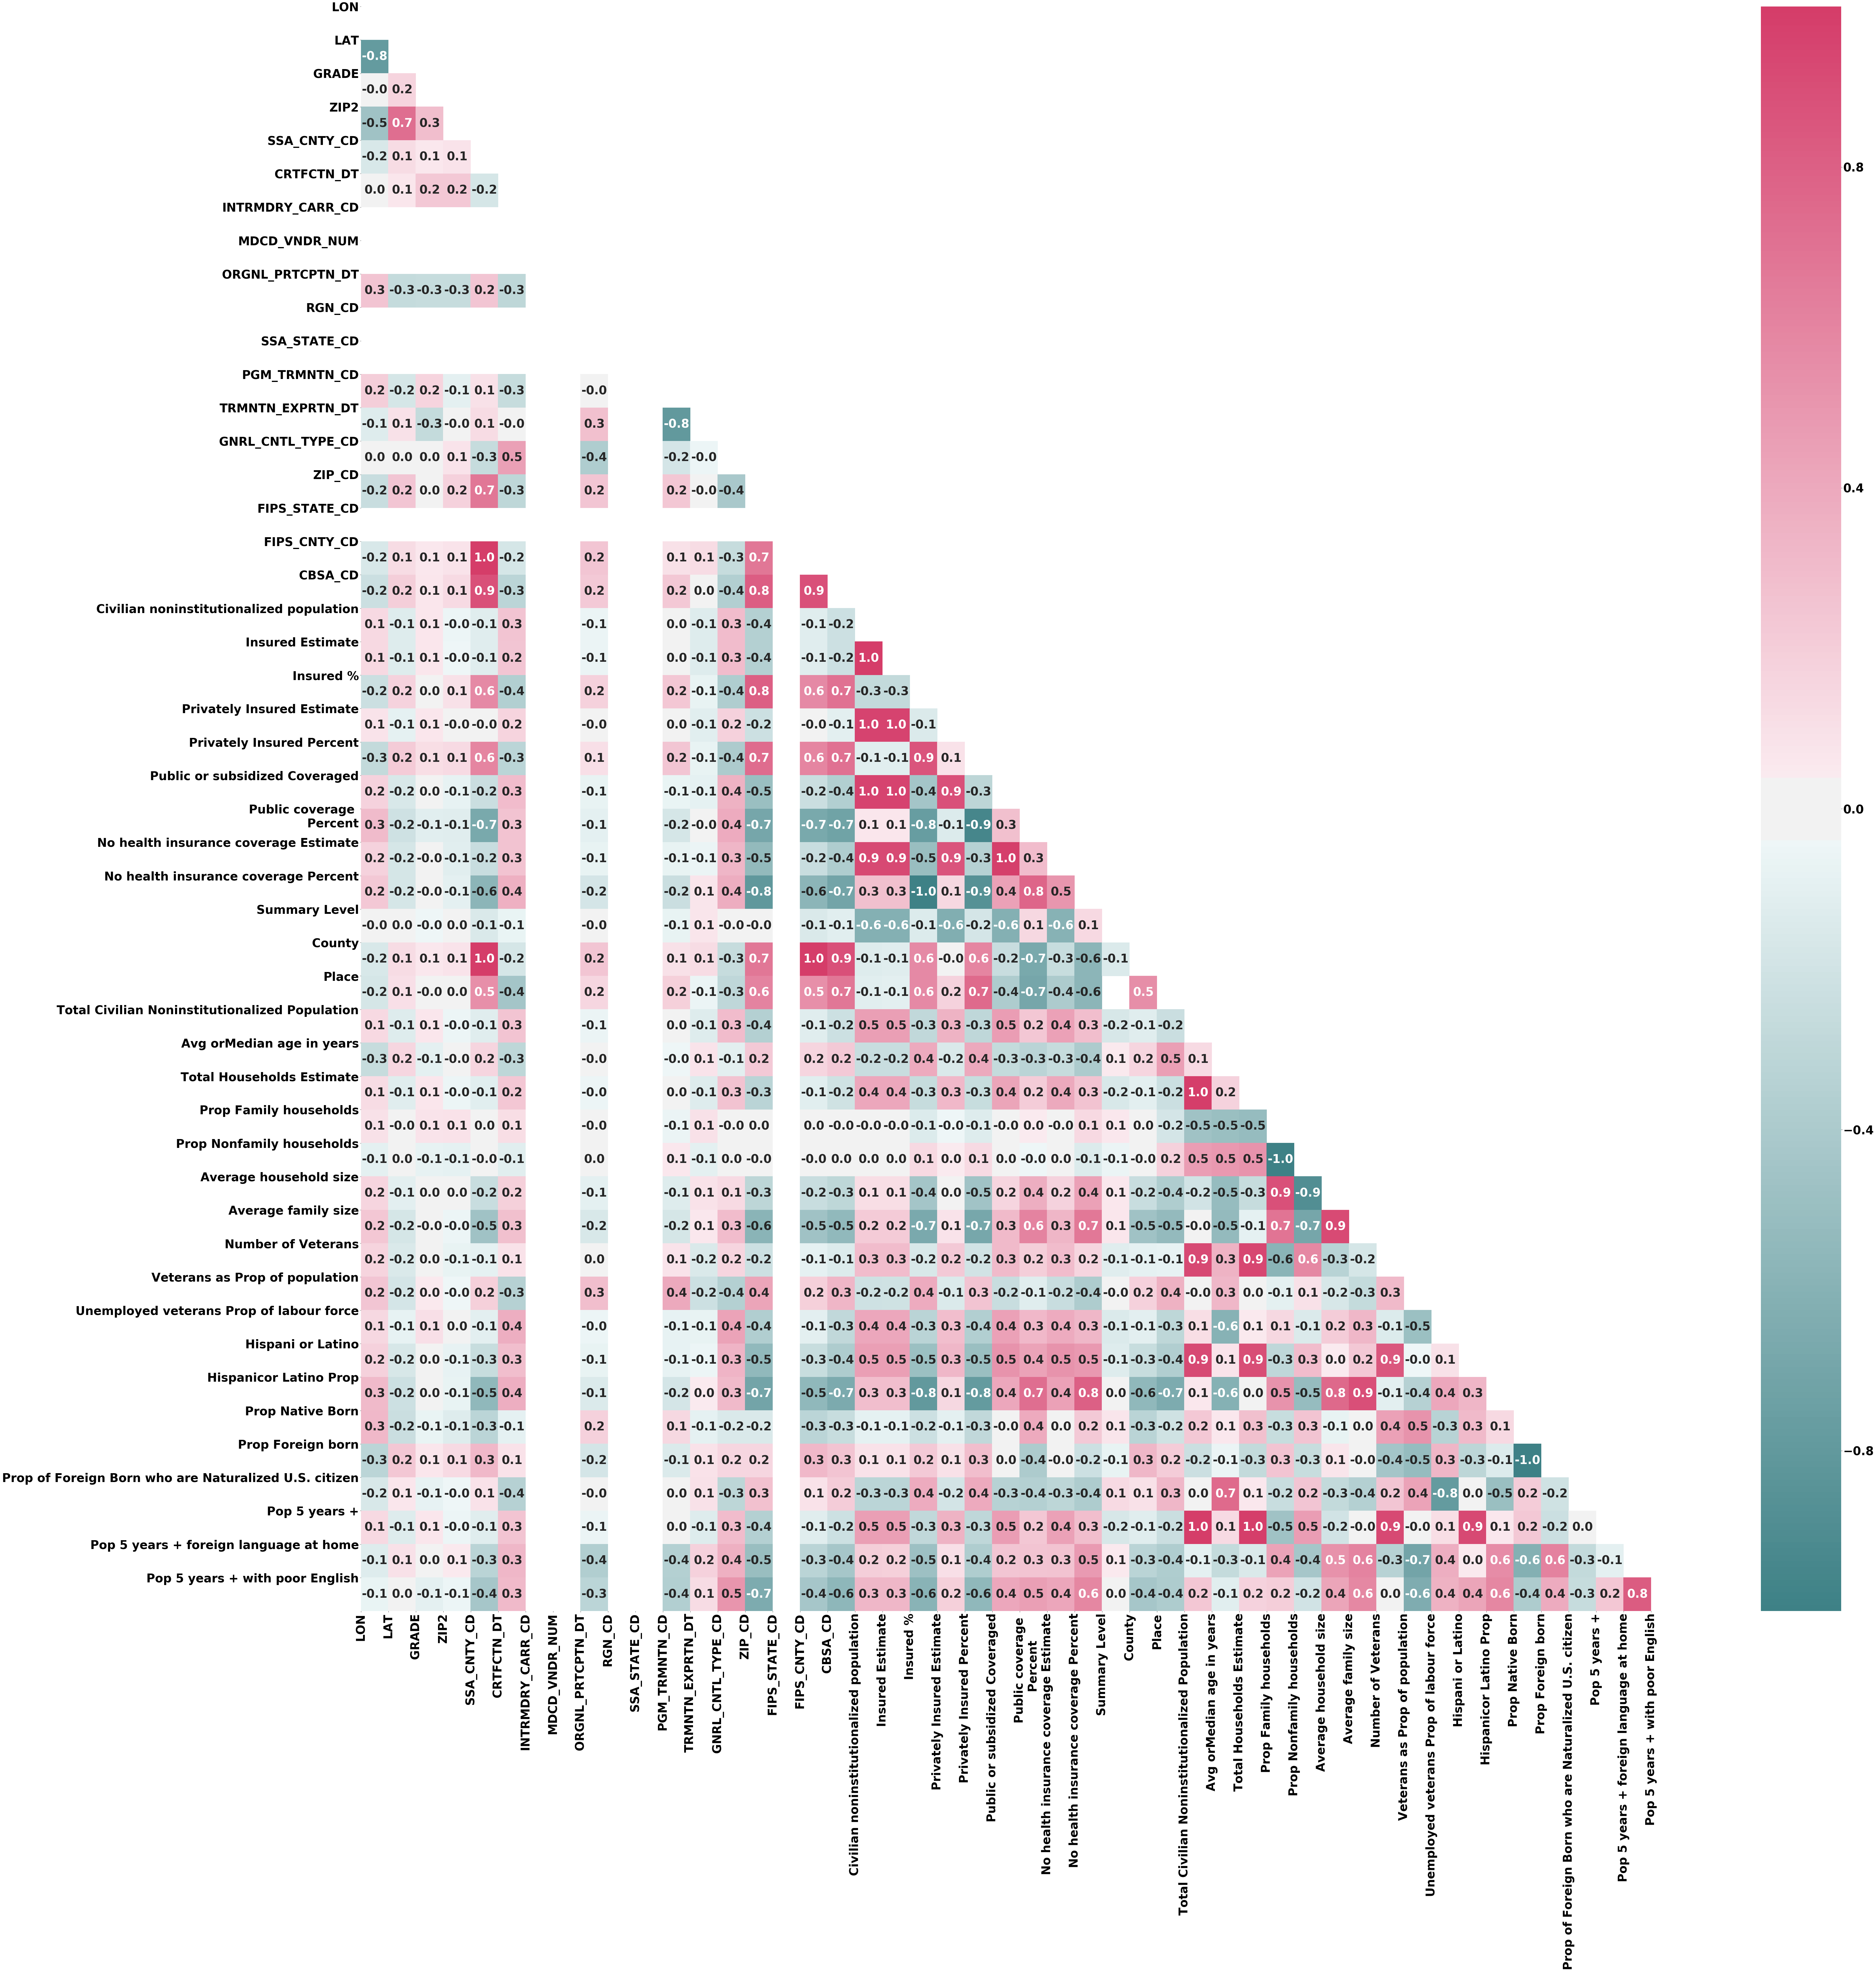

In [16]:
import numpy as np

halfHeatMap(cutdata_df, mirror=False)
# plt.savefig("kendall.pdf", bbox_inches='tight')

In [17]:
# halfHeatMap(cutdata_df.corr(method='pearson'), mirror=False)
# plt.savefig("pearson.pdf", bbox_inches='tight')
# #ADD IN VAR FOR CORRELATION TYPE

In [18]:
# halfHeatMap(cutdata_df.corr(method='spearman'), mirror=False)
# plt.savefig("spearman.pdf", bbox_inches='tight')

In [39]:
# get the row of max value
# x = kcorr_df.loc[kcorr_df['GRADE'].idxmax()]
# print(x)
# y = kcorr_df.loc[kcorr_df['GRADE'].idxmin()]
# y

# pcorr_none_df = pcorr_df(pcorr_df['GRADE'].values < 0.3)
first_cut = pcorr_df.loc[(pcorr_df['GRADE'] >= 0.5)]
# pcorr_weak_df = pcorr_df((pcorr_df['GRADE'] > 0.3) & (pcorr_df['GRADE'] < 0.5))
# pcorr_moderate_df = pcorr_df[(pcorr_df['GRADE'] > 0.5) & (pcorr_df['GRADE'] < 0.7)]
# pcorr_strong_df = pcorr_df[(pcorr_df['GRADE'] > 0.7) & (pcorr_df['GRADE'] < 1)]
# pcorr_strong_df.count()
pcorr_df.sort_values('GRADE')
first_cut

LON       LAT  GRADE      ZIP2  SSA_CNTY_CD  CRTFCTN_DT  \
GRADE -0.080115  0.139984    1.0  0.109649      0.01843    0.151443   

       ORGNL_PRTCPTN_DT  PGM_TRMNTN_CD  TRMNTN_EXPRTN_DT  GNRL_CNTL_TYPE_CD  \
GRADE         -0.113149       0.131403         -0.231305          -0.064297   

                    ...                 Veterans as Prop of population  \
GRADE               ...                                       0.010616   

       Unemployed veterans Prop of labour force  Hispani or Latino  \
GRADE                                  0.122552           0.036379   

       Hispanicor Latino Prop  Prop Native Born  Prop Foreign born  \
GRADE                0.009555         -0.057692           0.057692   

       Prop of Foreign Born who are Naturalized U.S. citizen  Pop 5 years +  \
GRADE                                          -0.134418           0.043108   

       Pop 5 years + foreign language at home  Pop 5 years + with poor English  
GRADE                                0.038925                        -0.061348  

[1 rows x 43 columns]

TypeError: unhashable type: 'list'

In [30]:
l1

[Pandas(LON=1.0, LAT=-0.5980588276294696, GRADE=-0.031651574818643585, ZIP2=-0.30328725140854884, SSA_CNTY_CD=-0.09124536886077587, CRTFCTN_DT=0.01230769069853664, INTRMDRY_CARR_CD=nan, MDCD_VNDR_NUM=nan, ORGNL_PRTCPTN_DT=0.16576778961074995, RGN_CD=nan, SSA_STATE_CD=nan, PGM_TRMNTN_CD=0.1646081675334374, TRMNTN_EXPRTN_DT=-0.09468096781540256, GNRL_CNTL_TYPE_CD=0.012628143890566547, ZIP_CD=-0.15628626104141213, FIPS_STATE_CD=nan, FIPS_CNTY_CD=-0.09124536886077587, CBSA_CD=-0.1499731318797962, _18=0.09241208710833994, _19=0.0920615942666426, _20=-0.15348306733140102, _21=0.058364211057742144, _22=-0.18059473969965473, _23=0.11976841104857339, _24=0.20459137683355205, _25=0.12268322396677056, _26=0.15348306733140102, _27=-0.02034226777959306, County=-0.09393739778681777, Place=-0.11207825434218098, _30=0.09241208710833994, _31=-0.18765716270047567, _32=0.0830811093125406, _33=0.06486048607950899, _34=-0.06486048607950899, _35=0.11200607568486814, _36=0.16694639307190573, _37=0.1175724661